## Importing Packages

In [2]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from datetime import timedelta
from tqdm import tqdm
import pprint
import re
import time
from datetime import date,datetime
from dateutil import parser
from googleapiclient.discovery import build

# Installing Required Packages #
# !{sys.executable} -m pip install tqdm
# !{sys.executable} -m pip install datetime
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install google-api-python-client


mydevkey = "XXXXXXXXXXXXXXXXXXXXX"

#links for Yourube build documentation
#https://googleapis.github.io/google-api-python-client/docs/dyn/youtube_v3.html
#https://github.com/googleapis/google-api-python-client/blob/main/docs/start.md

## Creating build() method and setting variable name

In [3]:
#Importing youtube module and setting build var with parameters 
#Use the build() function to create a service object. It takes an API name, API version and Dev Key as arguments. 

youtube = build('youtube', 'v3', developerKey =mydevkey)

## Retrieving Youtube channel ID

In [1]:
# Use this url below to find the channel id for the repective channel you want to analyze 
# https://commentpicker.com/youtube-channel-id.php

## Retrieving Overall Channel Data

##### Provides channel information using channels() method

In [5]:
#In this instance I am using the channel 'LCK Global' with channel ID: UCKVlixycWmapnGQ_wht4cHQ

#using this block to get the content details of LCK Global using the channels() method 
channel_ID_request = youtube.channels().list(
                part = 'contentDetails',             # This is for the type of info to be printed on the channel
                id = 'UCKVlixycWmapnGQ_wht4cHQ'      # This is for the channel Id
)

#Executing the above request to the api
channel_ID_response = channel_ID_request.execute()

In [6]:
#Printing out results from API channel request
channel_ID_response

{'kind': 'youtube#channelListResponse',
 'etag': 'JfjQPp4JVCWVD5s09YOp48Ou1Vk',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'Ma2Q8qlmvsMTXRqxrqPOboFALkc',
   'id': 'UCKVlixycWmapnGQ_wht4cHQ',
   'contentDetails': {'relatedPlaylists': {'likes': '',
     'uploads': 'UUKVlixycWmapnGQ_wht4cHQ'}}}]}

## Calling the Playlist() Method
##### This Method allows a user to get all of the playlist IDs from a channel

In [7]:
playlist_from_channel_request = youtube.playlists().list(
                part = 'contentDetails',
                channelId = 'UCKVlixycWmapnGQ_wht4cHQ', # This is the id/channel id 'UCKVlixycWmapnGQ_wht4cHQ' for LCK Global
                maxResults = 50                         # Max Results parameter takes an INT as an arguement and prints out the given number of results per page for the API Request
)

playlist_response = playlist_from_channel_request.execute()     #Executing request

In [231]:
playlist_response

#There are 67 total results (ie 67 total playlists for this channel)

{'kind': 'youtube#playlistListResponse',
 'etag': 'YxX5-L8HpWqIsI-DjtOuSOEw0Fo',
 'prevPageToken': 'CDIQAQ',
 'pageInfo': {'totalResults': 67, 'resultsPerPage': 50},
 'items': [{'kind': 'youtube#playlist',
   'etag': 'rP35haNbBIIMI2wUT_KQXJfpUNU',
   'id': 'PLFZGI6Zp1bXzIizmesfzwIHnomesc66l0',
   'contentDetails': {'itemCount': 95}},
  {'kind': 'youtube#playlist',
   'etag': 'M-a0AekgsEqd3Meji_HpTLcN1ck',
   'id': 'PLFZGI6Zp1bXz75wuD7Hnnks3iLZvZtMWR',
   'contentDetails': {'itemCount': 236}},
  {'kind': 'youtube#playlist',
   'etag': 'e4XfWkMN9nXCYRGgXpblflX_3dQ',
   'id': 'PLFZGI6Zp1bXzuyrmr_IrGRQEHwa97ucml',
   'contentDetails': {'itemCount': 4}},
  {'kind': 'youtube#playlist',
   'etag': 'gYWEYBAKha6SMVnGB_895DenXd8',
   'id': 'PLFZGI6Zp1bXwYg7_Qg-Y3chm7Xd-Qsu_F',
   'contentDetails': {'itemCount': 3}},
  {'kind': 'youtube#playlist',
   'etag': '1Vls3jc4ndzKKG0SvAS4tYQHgrw',
   'id': 'PLFZGI6Zp1bXxgyP_T7U_6brGF3jB0OJDL',
   'contentDetails': {'itemCount': 13}},
  {'kind': 'youtube#p

In [9]:
playlist_response['pageInfo']

{'totalResults': 67, 'resultsPerPage': 50}

In [10]:

nextPageToken = None                                        # Creating a variable to grab the nextpagetoken in order to pass through all pages of results
playlistinfo = []                                            # Creating a list for the playlist info output

while True: 

    playlist_from_channel_request = youtube.playlists().list(
                    part = 'contentDetails',
                    channelId = 'UCKVlixycWmapnGQ_wht4cHQ', # This is the id/channel id 'UCKVlixycWmapnGQ_wht4cHQ' for LCK Global
                    pageToken = nextPageToken,              # This parameter is required to get all results back since youtube api limits 50 results to each page
                    maxResults = 50                         # Max Results parameter takes an INT as an arguement and prints out the given number of results per page for the API Request
    )

    playlist_response = playlist_from_channel_request.execute()

    nextPageToken = playlist_response.get('nextPageToken')  # This grabs the nextPageToken from the playlist_response and uses it as the pageToken variable to grab the next page of results 

    for i in playlist_response['items']:
        playlistinfo.append(i)

    if not nextPageToken:                                   # This line breaks out of the while loop once there is no more nextpagetokens provided (ie we have hit the last page of results)
        break

In [11]:
#Confirming we have all 67 playlistIDs

len(playlistinfo)

67

In [12]:
playlistIDs = []       #Creating list to store all of the playlist ids to use later

for i in playlistinfo:              #Looping through the ouput from the last API call tog et only the playlist Ids
    print(i['id'])
    playlistIDs.append(i['id'])

print(len(playlistIDs))         #Checking output

PLFZGI6Zp1bXzoQfA4eW84NIqKJLu4iUzy
PLFZGI6Zp1bXzO25x_1SeK-AZTanlvnQHd
PLFZGI6Zp1bXwZDtbpKHT2eQdAsJoQ8b8m
PLFZGI6Zp1bXxvCZWsZWNiyFNC-OwAKT8I
PLFZGI6Zp1bXz8xOkqvVplO4tqsO5Mfvbd
PLFZGI6Zp1bXyW-FbaaHqgF-v5sMkdTwxi
PLFZGI6Zp1bXyZD5Kfjs03JKqsZ8WFz4Rl
PLFZGI6Zp1bXwNlxGQH_jaGoGFg4STIovO
PLFZGI6Zp1bXz_bcoRn7gzEMMbKinGaWTo
PLFZGI6Zp1bXzxizbagxwOFh0xKTnMSi1c
PLFZGI6Zp1bXxGOsTCWIC11NOTxzyLoayx
PLFZGI6Zp1bXykrtPOGH6OpwvcVLhLFcd3
PLFZGI6Zp1bXwXkvOEb8-Eq7apVmRotKxS
PLFZGI6Zp1bXylTwrP8BhZ-DyTkzJi62bN
PLFZGI6Zp1bXy4qHoUG-C2_svdDwrL0ZWb
PLFZGI6Zp1bXxFGcDUhAZAb6meYKJBBXw7
PLFZGI6Zp1bXyBtkc4l9WXmNht5PYiMden
PLFZGI6Zp1bXxD5HwHhjLd8z5aDFvNzQCU
PLFZGI6Zp1bXz91ExCrKFx5ehZLIgiCQ_l
PLFZGI6Zp1bXyIc8NpuqFdsYKTF462ruW6
PLFZGI6Zp1bXyGAmYM5yZCmOaUTu0nrlwh
PLFZGI6Zp1bXw92r90Wx1VUw7Kb91kot45
PLFZGI6Zp1bXymsiFaxX_vMZvhNAhvutC9
PLFZGI6Zp1bXyq0Yul4T_fEFILxDRkVJpO
PLFZGI6Zp1bXwGm2N52wFQ4EWzn7xc9OmN
PLFZGI6Zp1bXyH8IEbHNHqG0zT5Spw-VaQ
PLFZGI6Zp1bXy2ZTC1_OcVmuHFQvCsj3ML
PLFZGI6Zp1bXy9kSlT8m6qb5VXLyY4gcLk
PLFZGI6Zp1bXyZ7LDkOl

## Using playlistitems() method
#### This allows a user to retrieve all of the videoIDs from each respective playlist from playlistIDs variable

In [13]:
nextPageToken_videos = None                                 # Creating a variable to store the nextpage key
videoInfo = []                                              # List for storing video info
videoIDs = []                                               # List for storing Video Ids

for i in playlistIDs:
    videos_from_each_playlist_request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = i,                         # This is the id/channel id 'UCKVlixycWmapnGQ_wht4cHQ' for LCK Global
                    pageToken = nextPageToken_videos,       # This parameter is required to get all results back since youtube api limits 50 results to each page
                    maxResults = 50                         # Max Results parameter takes an INT as an arguement and prints out the given number of results per page for the API Request
    )

    videos_from_each_playlist_response = videos_from_each_playlist_request.execute()

    for i in videos_from_each_playlist_response['items']:   # Storing the video info before going to the "next page of results"
            videoIDs.append(i['contentDetails']['videoId']) # Grabbing only the video ids

    nextPageToken_videos = videos_from_each_playlist_response.get('nextPageToken')  # This grabs the nextPageToken from the playlist_response and uses it as the pageToken variable to grab the next page of results 

In [14]:
len(videoIDs)

1571

In [215]:
#checking output looks ok
videoIDs[0:5]

['0TNs9THr9cA', 'yh5OXkuZwUE', 'l2gjnge2ICw', '9EsFExeZKAQ', 'uPexvgL67ps']

In [16]:
# Youtube requires a certain format of each video: The format is seperated by a comma but as one long string rather than individual strings 
# Example: 'yh5OXkuZwUE,l2gjnge2ICw,9EsFExeZKAQ,uPexvgL67ps'   .........

#Formatting the videos list to the required format
videoIDs_formatted = ','.join(videoIDs)

1571
['DSKGmxO3gwY', 'McGnF6mdYF4', 'drCtp-Qb0cU', 'u_v_e4YRY0c', 'dqMsv0J2LfQ']


## Using the Videos() Method
#### This gives all of the information for each video from the videoIDs list

#### Youtube limits the amount of requests you can make within a short period of time
#### In order to get around this, the code below breaks up the list of ~1500 video IDs into smaller lists of 50 video IDs per sub list 

In [17]:
#Creating a copy of the VideoIds list
data = videoIDs

#This function takes in a list (lst) and the length that the user wants the smaller lists to be (n) 
def chunks(lst: list, n: int) -> list:
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [18]:
#checking output
pprint.pprint(list(chunks(data, 50)))

[['0TNs9THr9cA',
  'yh5OXkuZwUE',
  'l2gjnge2ICw',
  '9EsFExeZKAQ',
  'uPexvgL67ps',
  'DSKGmxO3gwY',
  'McGnF6mdYF4',
  'drCtp-Qb0cU',
  'u_v_e4YRY0c',
  'dqMsv0J2LfQ',
  'Hv9p4P9TrBM',
  'Ya80JNGcCFQ',
  'ypsSZNnui9A',
  'tMLK0oXuA7g',
  'ctyr26K2PNE',
  'kC0O9_UC7cA',
  'KAb6q0V_2JU',
  'KULGNyFOyaE',
  '8cssdGdDQP0',
  '1_J3STpB_k0',
  'Ej-DbFt6Bio',
  'oN9fEFiseT8',
  'iQzqyDPo9Tc',
  'ZE14lK0GSWY',
  'HQFDoxS_BGY',
  'gs-2Fns5ny8',
  'i124Xa43vXM',
  'GrE9OPFcVKI',
  '9IiU0D1RzJg',
  'xb1OapwuIPU',
  'oyj2XbRV9qg',
  'aPxcgwBtzZU',
  '2wsZqsfpMeY',
  'MoVB7UZDUoU',
  'PlJ3sZ2iM7Y',
  '9qzX8yoiOYE',
  'TVJAmxApC2o',
  'UcTYCNMg94A',
  'MKNuH4cYQX0',
  'AGrByOrG_Sw',
  '9N46foCjpwI',
  'UJJt06dYNkI',
  'AM2MOeizmxE',
  'unRodMP6AuM',
  'dTG5GGR8Enk',
  '3VR_Q_IsaAk',
  'cl1AgUpV4d4',
  'geGn8GLitf4',
  'KUdCMwyx7w4',
  'XEI_bw2OMNc'],
 ['f5IyU4lKQOY',
  '3UPiPR9p678',
  'O9TThlnAA-k',
  'k70W3loM0Jo',
  'zTeJvoct8lE',
  'MYvIILz646c',
  'Esw9zg0Vzk0',
  'bfVURR_81bU',
  'm-g-DR9zMp

In [19]:
videoIDs_list_of_lists = (list(chunks(data, 50)))

In [22]:

infoforvids = []                                                             # List for videoinfo from videos() method

for i in tqdm(videoIDs_list_of_lists):                                       # tqdm provides a progress bar for for loops
        videoIDs_information_request = youtube.videos().list(                # Using videos() method to get info on each respective video id that is passed through
                part = "contentDetails,snippet,statistics",                  # Using multiple arguements for part param to get different types of info for the videos
                maxResults = 50,
                id = i)

        videoIDs_information_response = videoIDs_information_request.execute()

        infoforvids.append(videoIDs_information_response)

        time.sleep(7)                                                        # must set a delayed time for passing in each list of 50 video ids
                                                                             # Youtube does not allow more than 50 requests at once 

        

100%|██████████| 32/32 [03:55<00:00,  7.36s/it]


In [234]:
infoforvids

[{'kind': 'youtube#videoListResponse',
  'etag': '5SNf6PPh4_YlJva0LTvBF2tLjaU',
  'items': [{'kind': 'youtube#video',
    'etag': '0bMCRwOpdYksoZWLq5dJSkbyV3s',
    'id': '0TNs9THr9cA',
    'snippet': {'publishedAt': '2022-04-14T07:00:01Z',
     'channelId': 'UCKVlixycWmapnGQ_wht4cHQ',
     'title': '[LCK 10th. BEST MOMENT] Ep.10: Leblanc of the one',
     'description': "#LCK #WeMakeLegends\n\n✅ Watch LCK live on...\n🇬🇧-  http://twitch.tv/LCK\n🇨🇳 - http://huya.com/lck\n🇫🇷 - http://twitch.tv/otplol_\n🇩🇪 - http://twitch.tv/summonersinnlive\n🇩🇪 - http://youtube.com/user/SummonerInnDE\n🇮🇹 - https://www.twitch.tv/pg_esports_lol\n🇻🇳 - https://youtube.com/LCKTiếngViệt\n\n\nPlease don't forget to follow and subscribe LCK Channel !\n- LCK official Twitter: https://twitter.com/LCK\n- LCK official Facebook:  https://www.facebook.com/officiallck\n- LCK official Instagram:  https://www.instagram.com/lckofficial/\n- LCK official Tiktok : https://tiktok.com/@lck_official\n\nThis LCK YouTube Channel 

### Preparing to create dataframe

#### Parsing time to get video length

In [23]:
# Using regex to parse hours/minutes/seconds of video length
minutes_expression = re.compile(r'(\d+)M')
hours_expression = re.compile(r'(\d+)H')
seconds_expression = re.compile(r'(\d+)S')

#### Getting information for each video pulled form the infoforvideos list

In [24]:
duration_time = []
dur = []
video_names = []
views = []
likes = []
commentscount = []
published_date = []


for i in infoforvids:
    for j in (i['items']):
        #duration_time.append(j['contentDetails']['duration'])
        video_names.append(j['snippet']['title'])
        views.append(j['statistics']['viewCount'])
        likes.append(j['statistics']['likeCount'])
        commentscount.append(j['statistics']['commentCount'])
        published_date.append(j['snippet']['publishedAt'])

        dur = (j['contentDetails']['duration'])
        hours = hours_expression.search(dur)
        minutes = minutes_expression.search(dur)
        sec = seconds_expression.search(dur)
        hours = int(hours.group(1)) if hours else 0
        minutes = int(minutes.group(1)) if minutes else 0
        sec = int(sec.group(1)) if sec else 0

        time_in_seconds = timedelta(
            hours = hours,
            minutes = minutes,
            seconds = sec
        ).total_seconds()

        duration_time.append(time_in_seconds)

In [217]:
duration_time[0:5]

[620.0, 603.0, 732.0, 654.0, 802.0]

In [26]:
#Checking len of video_names list
len(video_names)

1558

## Creating a data frame for all of the video information

In [87]:
frame = {'Published_Date': published_date, 'Video_Name': video_names, 'Duration_Seconds': duration_time , 'Views' :views, 'Likes' : likes, 'Comment_count':commentscount}
df = pd.DataFrame(frame)

In [88]:
df.head(5)

Published_Date                                         Video_Name  \
0  2022-04-14T07:00:01Z  [LCK 10th. BEST MOMENT] Ep.10: Leblanc of the one   
1  2022-04-05T09:00:34Z            [LCK 10th. BEST MOMENT] Ep.9: Watch Me?   
2  2022-03-28T03:00:15Z             [LCK 10th. BEST MOMENT] Ep.8: Backdoor   
3  2022-03-21T00:00:04Z               [LCK 10th. BEST MOMENT] Ep.7: 94'40"   
4  2022-03-14T00:00:25Z        [LCK 10th. BEST MOMENT] Ep.6 : Top of Jayce   

   Duration_Seconds  Views Likes Comment_count  
0             620.0   4275   106            21  
1             603.0  11457   258            35  
2             732.0  11366   193            23  
3             654.0   7350   167            21  
4             802.0   7279   186             9

## Data Cleaning

In [ ]:
Published_Time = pd.to_datetime(df.Published_Date).dt.time
df.insert(1, 'Published_Time', Published_Time)
df['Published_Date'] = pd.to_datetime(df.Published_Date).dt.date

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Published_Date    1558 non-null   object 
 1   Published_Time    1558 non-null   object 
 2   Video_Name        1558 non-null   object 
 3   Duration_Seconds  1558 non-null   float64
 4   Views             1558 non-null   object 
 5   Likes             1558 non-null   object 
 6   Comment_count     1558 non-null   object 
dtypes: float64(1), object(6)
memory usage: 85.3+ KB


#### Transforming Variables

In [93]:
df[['Views', 'Likes', 'Comment_count']] = df[['Views', 'Likes', 'Comment_count']].astype(int)
df['Published_Date'] = pd.to_datetime(df.Published_Date)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Published_Date    1558 non-null   datetime64[ns]
 1   Published_Time    1558 non-null   object        
 2   Video_Name        1558 non-null   object        
 3   Duration_Seconds  1558 non-null   float64       
 4   Views             1558 non-null   int32         
 5   Likes             1558 non-null   int32         
 6   Comment_count     1558 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(2)
memory usage: 67.1+ KB


## EDA on newly created dataframe

In [95]:
df.describe()

Duration_Seconds         Views         Likes  Comment_count
count       1558.000000  1.558000e+03  1.558000e+03    1558.000000
mean        2081.758023  5.104410e+04  8.501829e+02      45.377407
std         5509.979658  1.603108e+06  2.559064e+04    1122.708580
min           11.000000  2.300000e+01  0.000000e+00       0.000000
25%          257.250000  8.182500e+02  9.000000e+00       0.000000
50%          395.000000  2.655000e+03  3.550000e+01       3.000000
75%          835.000000  6.138250e+03  1.037500e+02       9.000000
max        27628.000000  6.324841e+07  1.008003e+06   44221.000000

In [239]:
## Checking for duplicate entries

if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))

No. of duplicated entries:  35


In [240]:
df[df.duplicated(['Video_Name', 'Published_Date'])]

Published_Date Published_Time  \
317      2021-08-14       16:00:05   
318      2021-08-07       16:00:28   
319      2021-07-31       16:00:33   
320      2021-07-24       15:00:29   
321      2021-07-18       17:00:16   
322      2021-07-10       15:30:04   
324      2021-07-03       17:00:17   
325      2021-06-27       04:00:04   
326      2021-06-19       14:45:02   
487      2020-08-28       09:08:57   
489      2020-08-20       10:14:24   
491      2020-08-13       10:15:03   
493      2020-08-06       12:00:48   
495      2020-07-30       11:26:41   
497      2020-07-24       08:15:32   
499      2020-07-15       11:05:37   
501      2020-07-08       09:00:23   
503      2020-07-01       11:12:04   
666      2021-03-27       09:02:31   
667      2021-03-20       09:27:20   
668      2021-03-13       09:32:22   
669      2021-03-06       11:03:44   
670      2021-02-27       09:19:00   
673      2021-02-19       08:49:41   
674      2021-02-06       09:05:52   
675      2021-01-30       08:54:16   
677      2021-01-23       08:50:56   
916      2020-05-28       10:39:10   
919      2020-05-28       12:44:22   
923      2020-05-29       09:20:41   
945      2020-04-28       13:52:52   
955      2020-04-29       09:07:56   
1363     2019-06-09       09:17:27   
1495     2019-01-23       13:23:34   
1501     2019-01-19       10:26:36   

                                             Video_Name  Duration_Seconds  \
317   [LCK MIC CHECK] Ep9. The Brawl for the Last Ti...             314.0   
318   [LCK MIC CHECK] Ep.8 A Series of Unexpected Ev...             304.0   
319   [LCK MIC CHECK] Ep.7 The Beginning of Trundle'...             291.0   
320   [LCK MIC Check] Ep6. The DK vs NS Story, Frien...             301.0   
321   [LCK MIC CHECK] Ep5. CHOOOVY's Penta and DRX's...             294.0   
322   [LCK MIC CHECK] Ep.4 The Romantic Movement of ...             304.0   
324   [LCK MIC CHECK] Ep. 3 A Support's Dignity! And...             286.0   
325   [LCK MIC CHECK] Ep.2 A Chaotic Week 2! A New M...             275.0   
326   [LCK MIC Check] Ep.1 Finally back at LoL Park!...             292.0   
487   [4K] LCK Weekly Mad Movie | Highlight Montage ...             371.0   
489   [4K] LCK Weekly Mad Movie | Highlight Montage ...             381.0   
491   [4K] LCK Weekly Mad Movie | Highlight Montage ...             350.0   
493   [4K] LCK Weekly Mad Movie | Highlight Montage ...             355.0   
495   [4K] LCK Weekly Mad Movie | Highlight Montage ...             356.0   
497   [4K] LCK Weekly Mad Movie | Highlight Montage ...             345.0   
499   [4K] LCK Weekly Mad Movie | Highlight Montage ...             317.0   
501   [4K] LCK Weekly Mad Movie | Highlight Montage ...             290.0   
503   [4K] LCK Weekly Mad Movie | Highlight Montage ...             315.0   
666   [LCK MIC CHECK] ep.9 NS's "NUTS" Teamfighting!...             273.0   
667   [LCK MIC CHECK] ep.8 Veteran’s Dignity! GEN & ...             261.0   
668   [LCK MIC CHECK] ep.7 Rise of the East Side Tea...             289.0   
669   [LCK Mic CHECK] ep.6 Keria the Boomer? LCK's V...             260.0   
670   [LCK MIC CHECK] ep.5 T1, KT, BRO and GEN Fresh...             254.0   
673   [LCK MIC CHECK] ep.4 Bipolar Penta Teamwork, F...             237.0   
674   [LCK MIC CHECK] ep.3 Cho-ne! T1 Cuzz/Teddy Com...             242.0   
675   [LCK MIC CHECK] ep.2 The Entrance of Udyr and ...             224.0   
677   [LCK MIC CHECK] ep.1 DK vs T1 Behind the Legen...             247.0   
916   T1 vs DWG | Group Stage Match 3 H/L 05.28 | 20...             417.0   
919   DWG vs FPX | Group Stage Match 5 H/L 05.28 | 2...             321.0   
923   IG vs DRX | Group Stage Match 2 H/L 05.29 | 20...             286.0   
945   GRF vs SRB | Promotion Match2 H/L 04.28 | 2020...             835.0   
955   DYN  vs SRB | Promotion Winners Match Game1 H/...             298.0   
1363      SB vs KZ | Match9 Game1 H/L | 2019 LCK Summer             282.0   
1495  Interview wi

#### Removing videos that are music videos (not focused on game content)

In [180]:
rowdets = df[df.Video_Name.str.find('Take Over (ft. Jeremy McKinnon') == 0]
rowdets2 = df[df.Video_Name.str.find('Take Over - ford. Remix | Worlds 2020') == 0]

try:
    rowin = rowdets.index[0]
    rowin2 = rowdets2.index[0]
    df.drop([rowin, rowin2])
    print('Rows have been deleted')
except:
    print('No rows have been deleted')

No rows have been deleted


In [ ]:
df = df.reset_index()

## Visualizations

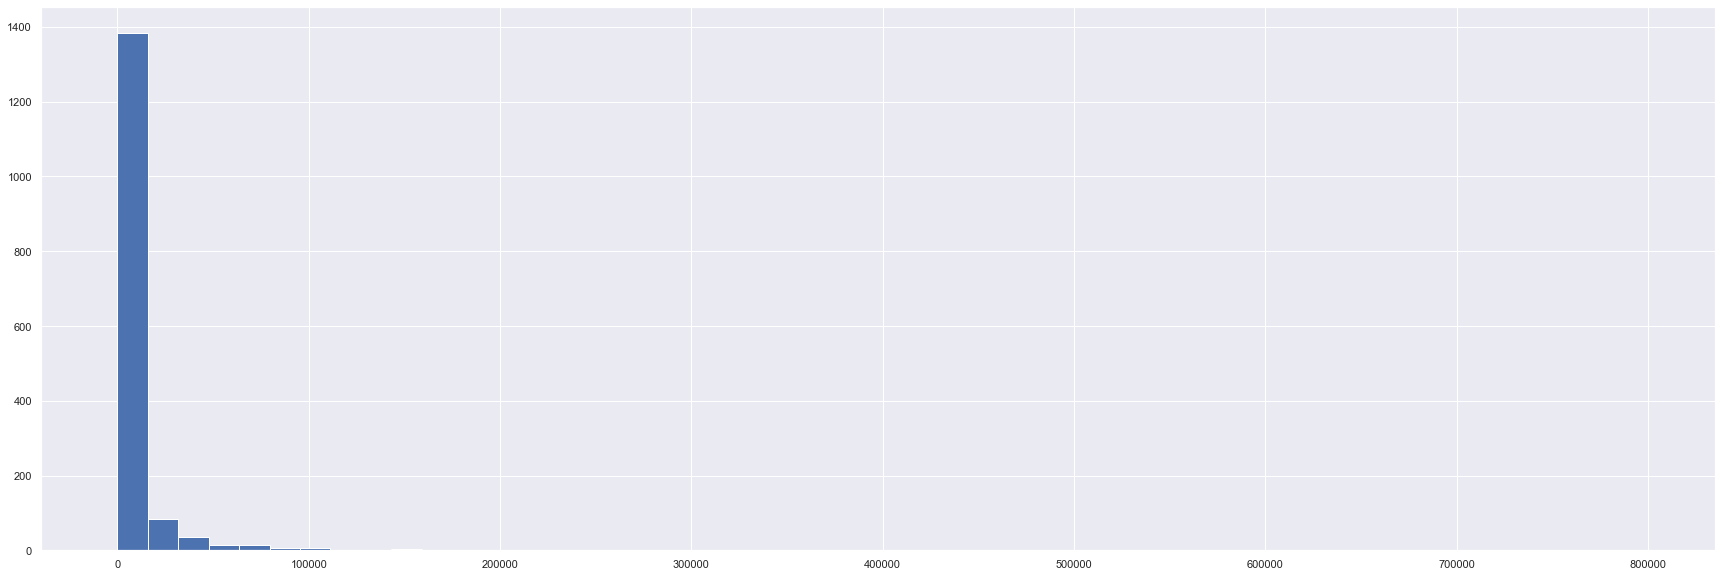

In [247]:
plt.figure(figsize = (30,10))
plt.hist(df.Views, bins = 50);

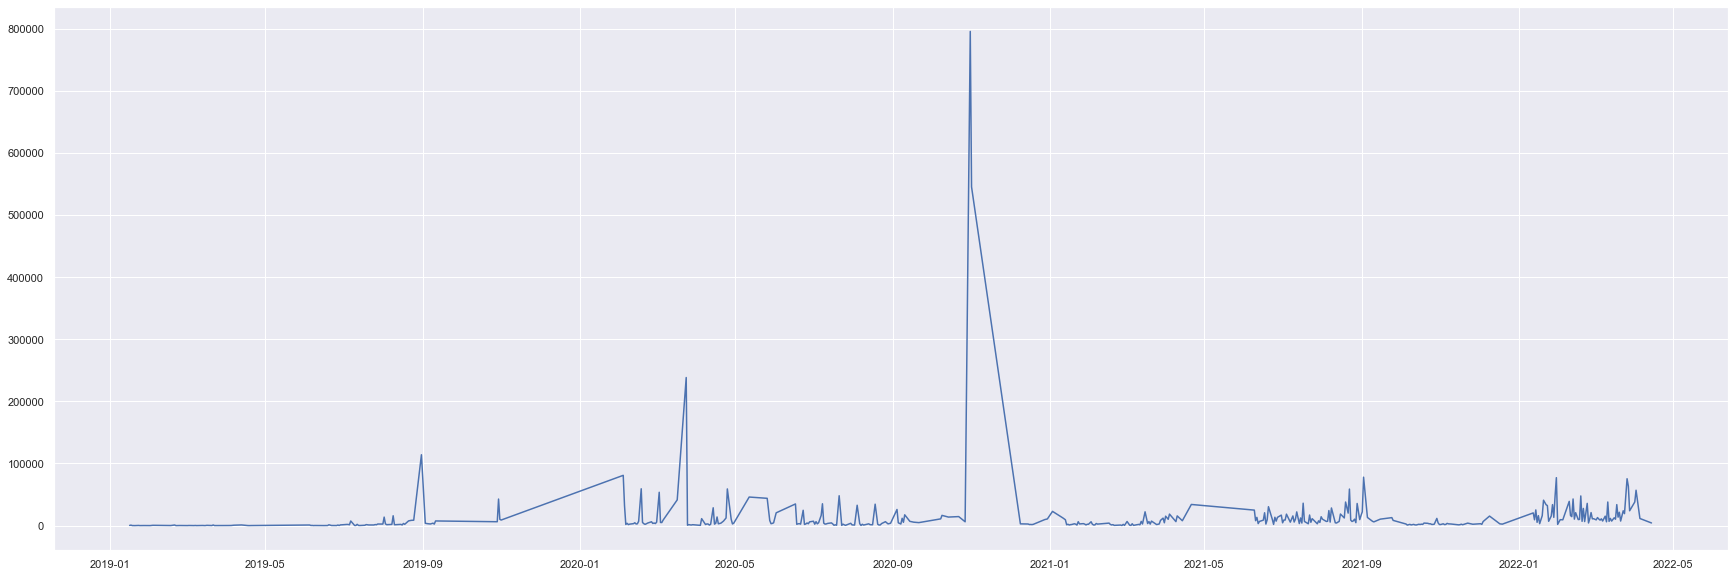

In [249]:
views_per_day = df.loc[:, ['Published_Date', 'Views']].groupby(['Published_Date']).mean()
plt.figure(figsize=(30,10))
plt.plot(views_per_day.index.values, views_per_day.Views);
# plt.plot(views_per_day.Published_Date, views_per_day.Views)

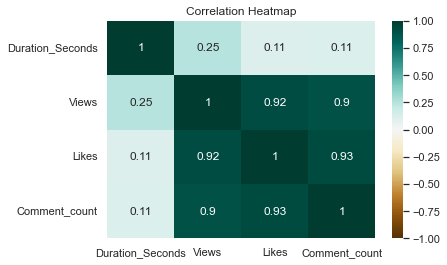

In [250]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap');

0.8817736372854083


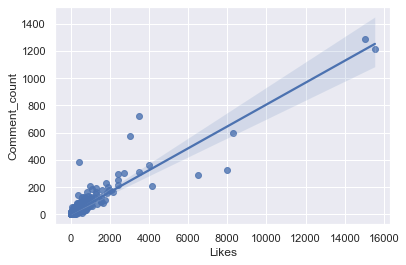

In [245]:
sns.regplot(x = df.Likes, y = df.Comment_count);
#using spearman here because there are no assumptions on the underlting data formation
print(df.Likes.corr(df.Comment_count, method = 'spearman'))

In [148]:
#
indicies = df.Views.nlargest(10).index
df.loc[indicies, ]

Published_Date Published_Time  \
721      2020-10-31       20:55:02   
720      2020-11-01       04:00:11   
987      2020-04-25       14:16:59   
1246     2019-08-31       07:57:43   
247      2021-08-28       14:19:47   
996      2020-03-24       12:20:53   
765      2020-06-17       11:24:09   
220      2021-09-02       15:34:43   
1010     2020-02-05       08:43:55   
248      2021-08-22       15:42:08   

                                             Video_Name  Duration_Seconds  \
721                   Worlds 2020: Moments and Memories             476.0   
720   LEGENDS | Worlds Mashup ft. (Aruvn, DAZBEE , 타...             239.0   
987                           2020 LCK OPENING CEREMONY             205.0   
1246                              GRF vs SKT Trash Talk             396.0   
247   DK vs. T1 [Full VOD]ㅣ2021 LCK Summer Split FINALS           21254.0   
996   Faker 2000 Kills Celebration [LIVING LEGEND - ...             874.0   
765                         2020 LCK Summer Split Title              91.0   
220   T1 vs. HLE [FULL VOD] | Finals | 2021 LCK Regi...           18604.0   
1010                      2020 LCK Spring Opening Title             105.0   
248   GEN vs. T1 [Full VOD]ㅣ2021 LCK Summer Playoffs...           17751.0   

       Views  Likes  Comment_count  
721   795408  15540           1213  
720   545161  15049           1286  
987   475097   8303            596  
1246  386969   3516            719  
247   318310   2705            305  
996   238339   6520            290  
765   197979   7990            327  
220   193485   1605            181  
1010  190478   2430            251  
248   176953   1874            156

In [186]:
likes_ratio = df.Likes/df.Views 
commentscount_ratio = df.Comment_count/df.Views

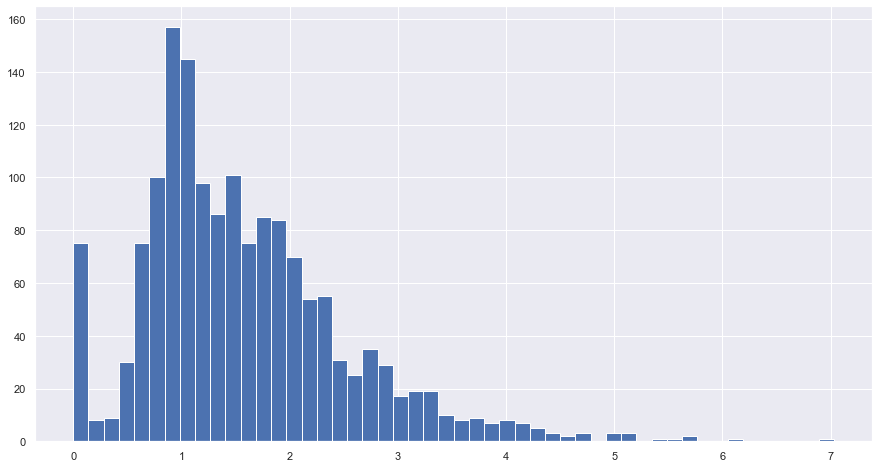

In [220]:
plt.figure(figsize=(15,8))
plt.hist((likes_ratio*100).sort_values(ascending = False), bins = 50);

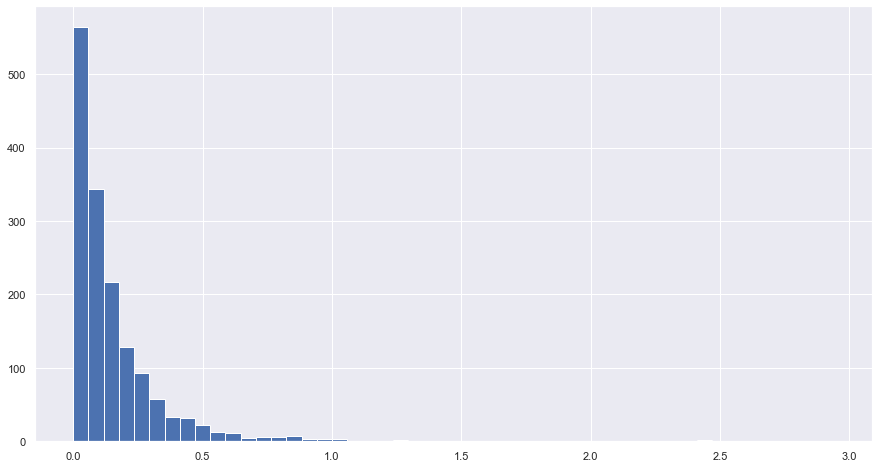

In [219]:
plt.figure(figsize=(15,8))
plt.hist((commentscount_ratio*100).sort_values(ascending = False), bins = 50);

In [213]:
#avg comment count and like per video
avg_comment = round(sum(df.Comment_count)/len(df),2)
print(avg_comment) 
avg_like = round(sum(df.Likes)/len(df),2)
print(avg_like) 

15.75
163.5
